# SGD

Let's dive in SGD - Stochastic Gradient Descent - which is an optimization method commonly used in neural networks.

In [1]:
%matplotlib inline
import torch
from fastai import *
import matplotlib.pyplot as plt

## linear regression problem

In [2]:
n = 100

In [3]:
# creates a matrix of n-rows and 2-columns
x = torch.ones(n, 2)
# referring to all rows in the first column
# in PyTorch, methods ending in "_" mean don't returning anything
# replace what this is being call on
x[:, 0].uniform_(-1, 1)
x[:5]

tensor([[ 0.6370,  1.0000],
        [-0.8185,  1.0000],
        [-0.2046,  1.0000],
        [ 0.2072,  1.0000],
        [ 0.2138,  1.0000]])

**tensor** means array

but not a Jagged (or ragged) array (e.g. array of arrays of which the member arrays can be of different sizes)

tensor is any rectangular array

When talking about tensors, we don't say dimmensions, we either say rank or axis. For example, an image is usually a rank-3 tensor, because it has height, width and 3 color channels

In [4]:
# rank-1 tensor or a vector
# 3-slope; 2-intercept
a = torch.tensor((3., 2))
a

tensor([3., 2.])

In [5]:
# making the dot product between x and a
y = x@a + torch.rand(n)

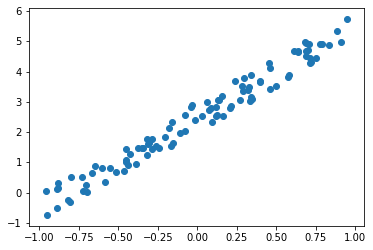

In [6]:
plt.scatter(x[:, 0], y)

We want to find **parameters** (weights) `a` such that you minimize the error between the points and the line `x@a`. Note that `a` is unknown. For a regression problem, the most common loss function is the mean squared error

In [7]:
def mse(yhat, y):
    return ((yhat - y) ** 2).mean()

suppose we believe `a = (1, 1)`, then we can compute `yhat` which is our prediction and then compute our loss function, which is mean squared error

In [8]:
a = torch.tensor([1., 1])
a

tensor([1., 1.])

In [9]:
yhat = x@a
mse(yhat, y)

tensor(3.4360)

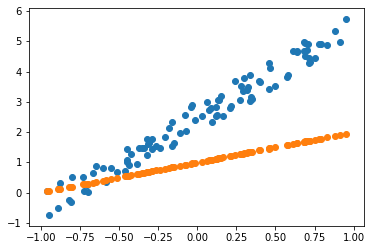

In [10]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], yhat)

so far we have specified the model (linear regression) and the evaluation criteria (loss function, MSE). Now we need to handle optimization, that is, how do we find the best values for `a`?

# gradient descent

here is a gradient descent implemented in PyTorch

In [11]:
a = torch.nn.Parameter(a)
a

Parameter containing:
tensor([1., 1.], requires_grad=True)

In [12]:
def update():
    yhat = x@a
    loss = mse(yhat, y)
    if t % 10 == 0:
        print(loss)
    # if you do a mathematical operation in a tensor in PyTorch
    # you can call backward to calculate the derivative
    # it is stored in a variable called grad
    loss.backward()
    # turning gradient calculations off
    with torch.no_grad():
        # substract from the a the gradient
        a.sub_(lr * a.grad)
        # zeroe the gradient
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100):
    update()

tensor(3.4360, grad_fn=<MeanBackward0>)
tensor(0.4613, grad_fn=<MeanBackward0>)
tensor(0.1974, grad_fn=<MeanBackward0>)
tensor(0.1202, grad_fn=<MeanBackward0>)
tensor(0.0953, grad_fn=<MeanBackward0>)
tensor(0.0873, grad_fn=<MeanBackward0>)
tensor(0.0847, grad_fn=<MeanBackward0>)
tensor(0.0839, grad_fn=<MeanBackward0>)
tensor(0.0836, grad_fn=<MeanBackward0>)
tensor(0.0835, grad_fn=<MeanBackward0>)


In [14]:
yhat = x@a

In [15]:
a

Parameter containing:
tensor([3.0046, 2.4769], requires_grad=True)

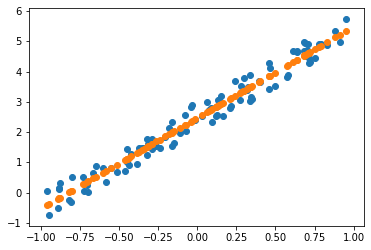

In [16]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], yhat.detach().numpy())

# animate it

In [17]:
from matplotlib import animation, rc
rc("animation", html="html5")

In [18]:
import numpy as np

In [19]:
yhat = np.array((x@a).detach().numpy())
x0 = x[:, 0].detach().numpy()

In [20]:
a = torch.nn.Parameter(torch.tensor([1., 1]))

fig = plt.figure()
plt.scatter(x[:, 0], y, c="orange")
line, = plt.plot(x0, yhat)
plt.close()

def animate(i):
    update()
    line.set_ydata((x@a).detach().numpy())
    return line

animation.FuncAnimation(fig, animate, np.arange(100), interval=20)

in practice we don't calculate on the whole dataset, we use mini batches

# vocab

* learning rate: how much are you going to update your weights
* epoch: one complete run through all the data points. If you do many epochs, it means your model looks at the same data points as many times, so it is more likely to overfit that data
* minibatch: random bunch of points
* SGD: stochastic gradient descent
* Model/Architecture: mathematical function we are fitting the parameters to
* Parameters: a.k.a. coefficients or weights are the numbers we are updating
* Loss function: how far away or close we are from the correct answer

For classification problems, we usually use _cross entropy loss_, a.k.a. _negative log likelihood loss_. This penalizes incorrect confident predictions, and correct unconfident predictions